Analyzing the flight booking dataset obtained from a flight booking website with over 300,000 datapoints to predict future flight prices. Application of exploratory data analysis, statistical methods and machine learning algorithms aided in the discovery of valuable insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
flight_booking=pd.read_csv("Flight_Booking.csv")

In [3]:
flight_booking

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
flight_booking.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


We can see that unnamed:0 is unnessary column here,immedately dropping it

In [5]:
flight_booking=flight_booking.drop(columns=['Unnamed: 0'])
flight_booking

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Loding the data to perform EDA

In [6]:
flight_booking.shape

(300153, 11)

In [7]:
flight_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
flight_booking.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
flight_booking.isnull().sum().sum()

0

# Data Visualization

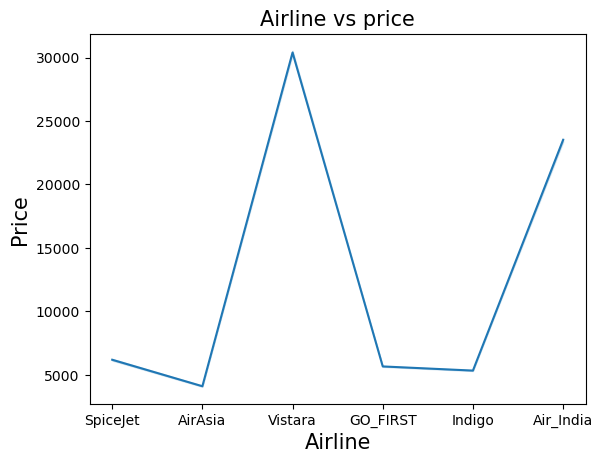

In [10]:
#Visualizing the price variation with respect to airline
# plt.figure(figsize=(10,10))
sns.lineplot(x=flight_booking["airline"],y=flight_booking["price"])
plt.title("Airline vs price",fontsize=15)
plt.xlabel("Airline",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

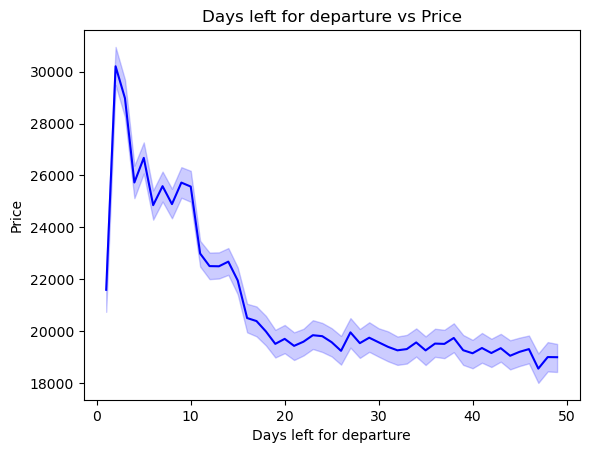

In [11]:
# Visualizing how ticket prices change closer to the departure date
sns.lineplot(x=flight_booking['days_left'], y=flight_booking['price'], color='blue')
plt.title('Days left for departure vs Price')
plt.xlabel('Days left for departure')
plt.ylabel('Price')
plt.show()

The price of the ticket increases as the days left for departure decreases

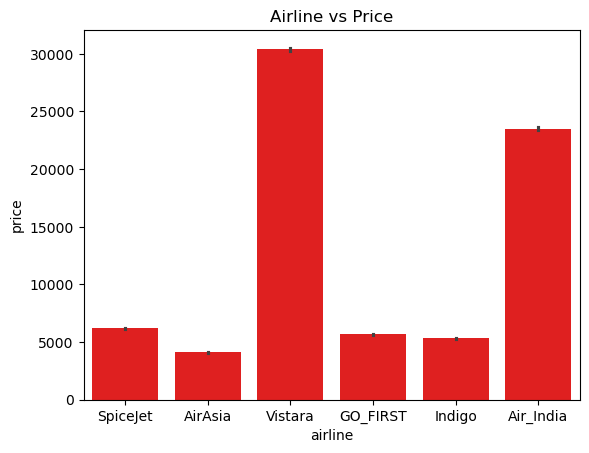

In [14]:
sns.barplot(x=flight_booking['airline'], y=flight_booking['price'],color="r")
plt.title('Airline vs Price')
plt.show()

vistara price is more than other airline

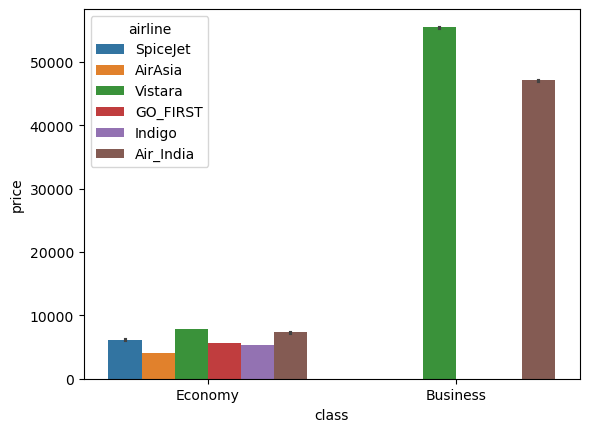

In [15]:
# Range of prices of all business and economy flights
sns.barplot(x='class',y='price',data=flight_booking, hue='airline')
plt.show()

we can see that only Vistara and Air India have business class tickets, bringing their mean price above the rest airlines

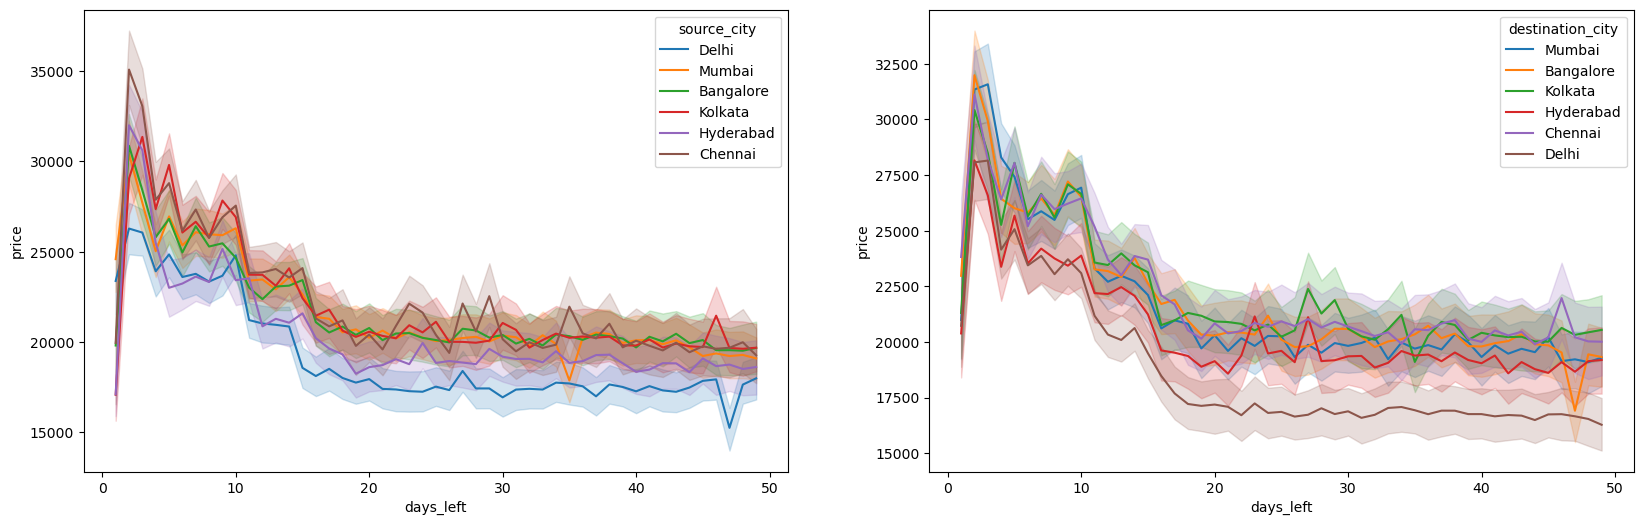

In [16]:
# Visualizing range of prices with source and destination city according to the days left
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=flight_booking,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=flight_booking,hue='destination_city',ax=ax[1])
plt.show()

We can infer that flights leaving from chennai and arriving in Mumbai and Bangalore, are generally more expensive closer to the departure date

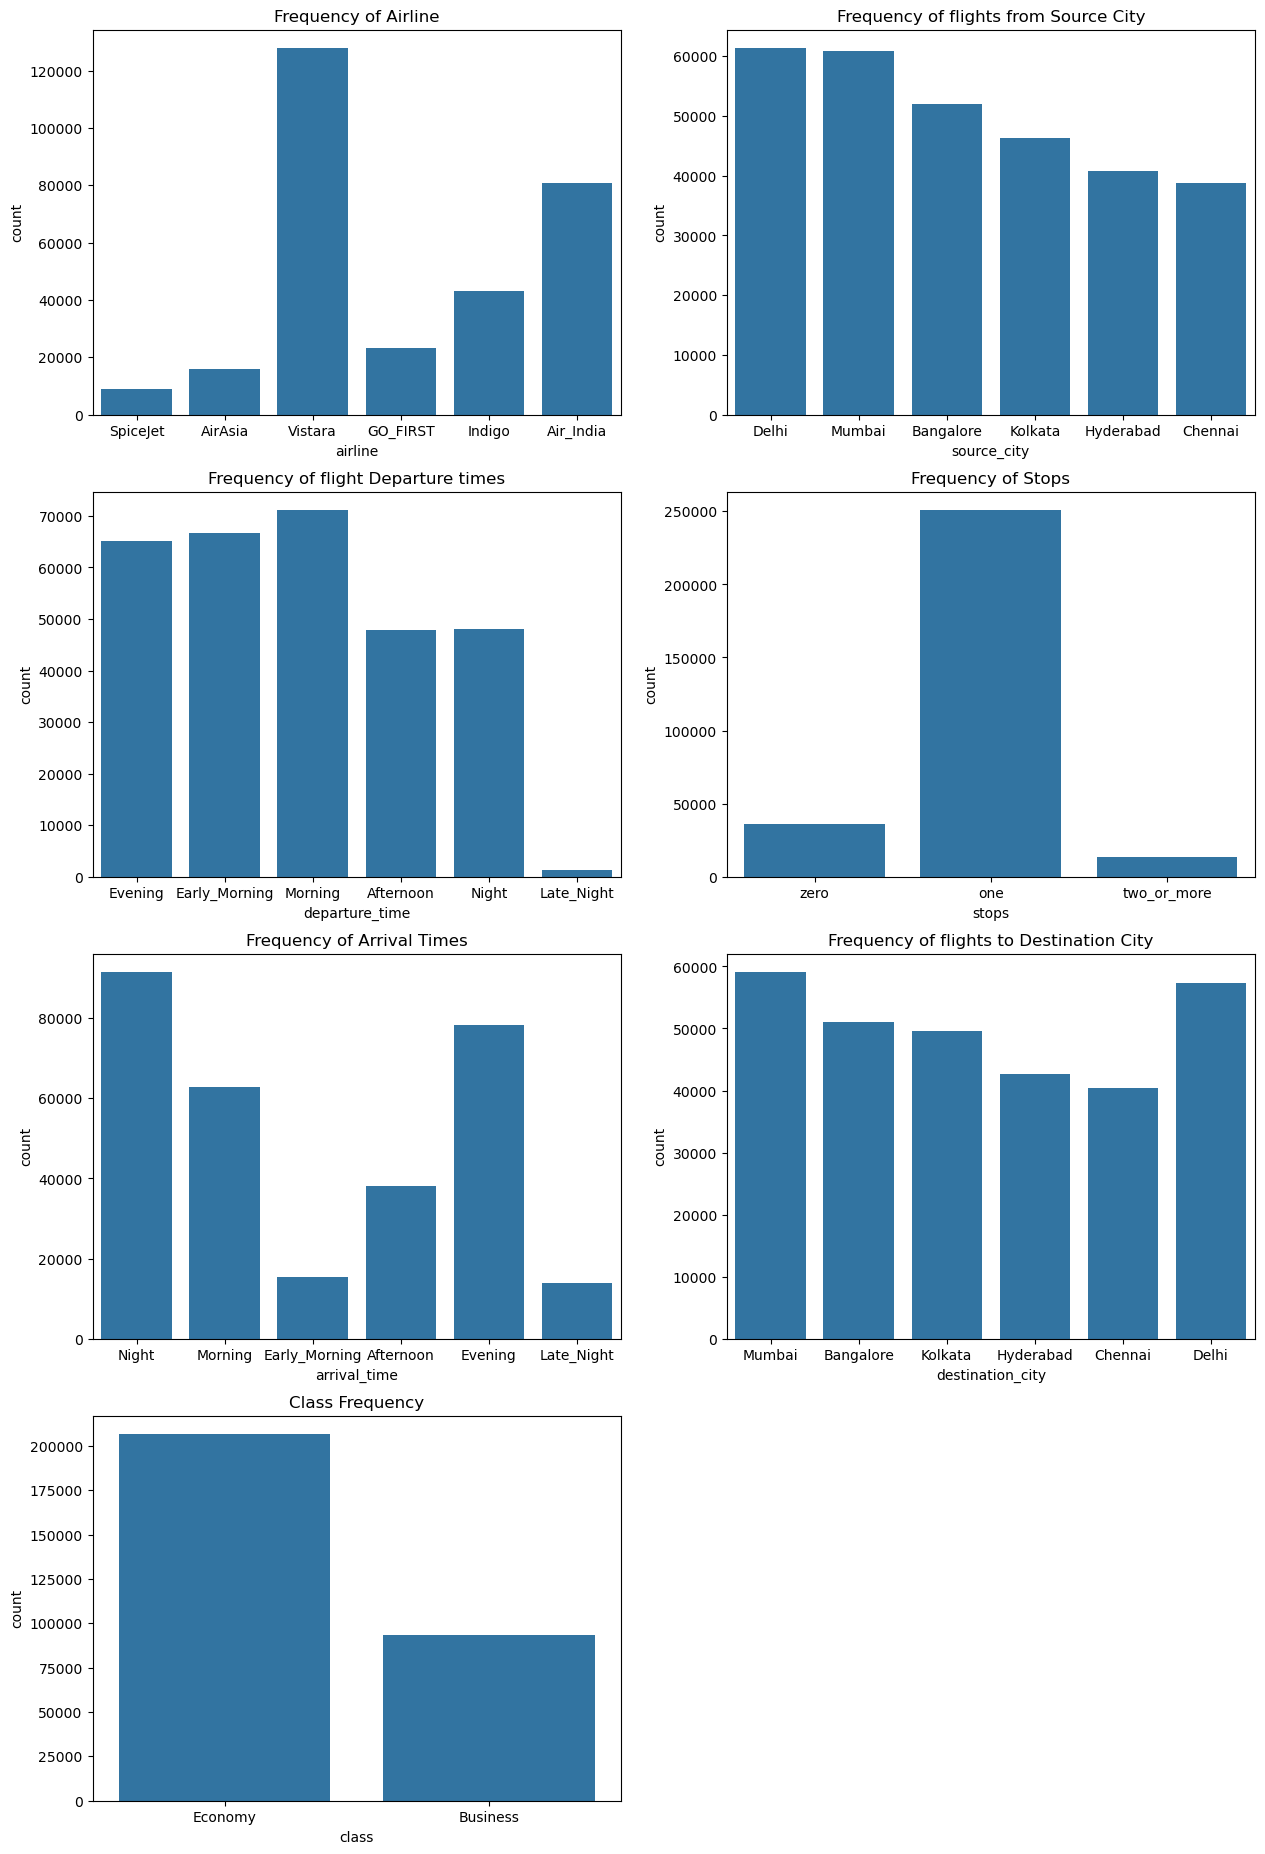

In [29]:
# Visualizing all the categorical features with countplot 
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=flight_booking['airline'])
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=flight_booking['source_city'])
plt.title('Frequency of flights from Source City')

plt.subplot(4,2,3)
sns.countplot(x=flight_booking['departure_time'])
plt.title('Frequency of flight Departure times')

plt.subplot(4,2,4)
sns.countplot(x=flight_booking['stops'])
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=flight_booking['arrival_time'])
plt.title('Frequency of Arrival Times')

plt.subplot(4,2,6)
sns.countplot(x=flight_booking['destination_city'])
plt.title('Frequency of flights to Destination City')

plt.subplot(4,2,7)
sns.countplot(x=flight_booking['class'])
plt.title('Class Frequency')

plt.show()

In [30]:
# Performing one hot encoding to convert categorical features to numerical ones for modelling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
flight_booking['airline'] = le.fit_transform(flight_booking['airline'])
flight_booking['source_city'] = le.fit_transform(flight_booking['source_city'])
flight_booking['departure_time'] = le.fit_transform(flight_booking['departure_time'])
flight_booking['stops'] = le.fit_transform(flight_booking['stops'])
flight_booking['arrival_time'] = le.fit_transform(flight_booking['arrival_time'])
flight_booking['destination_city'] = le.fit_transform(flight_booking['destination_city'])
flight_booking['class'] = le.fit_transform(flight_booking['class'])
flight_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


# Feature Selection

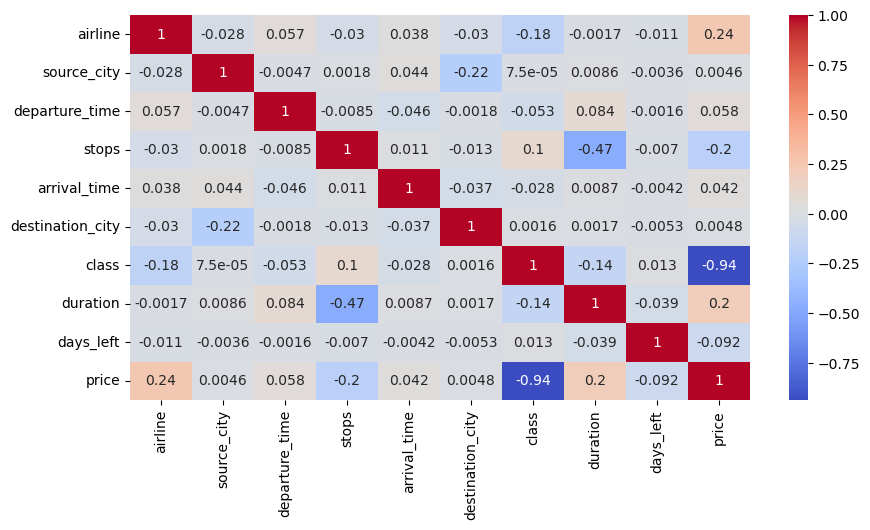

In [32]:
# Plotting the correlation graph to see the correlation between features and dependent variables
plt.figure(figsize=(10,5))
sns.heatmap(flight_booking.corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.show()

In [37]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 2.8 MB/s eta 0:00:00


In [38]:
# Selecting features using the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in flight_booking.columns:
    if ((flight_booking[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = flight_booking[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            Feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


We can see that all VIF values are below 5. So we can proceed with modeling.

Applying standardization and implementing Linear Regression Model to predict the price of a flight


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [41]:
X = flight_booking.drop(columns=['price','flight'])
y = flight_booking['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = linear_model.predict(X_test)

difference = pd.DataFrame(np.c_[y_test,y_pred],columns = ["Actual_Value","Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [43]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

print("R2 score: ", r2_score(y_test,y_pred))

mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ", mean_abs_error)

print("Mean Absolute percentage error: ",mean_absolute_percentage_error(y_test,y_pred))

mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print("Mean Square Error: ",mean_sq_error)

root_mean_sq_error = np.sqrt(mean_sq_error)
print("Root mean squared error: ",root_mean_sq_error)

R2 score:  0.904554350718816
Mean Absolute Error:  4624.994868017024
Mean Absolute percentage error:  0.43535810896835475
Mean Square Error:  49200540.29372198
Root mean squared error:  7014.309680483318


MSE of the model is 7014.309 and MAPE is 43.5 percent. Lower the RMSE and MAPE, better the model.

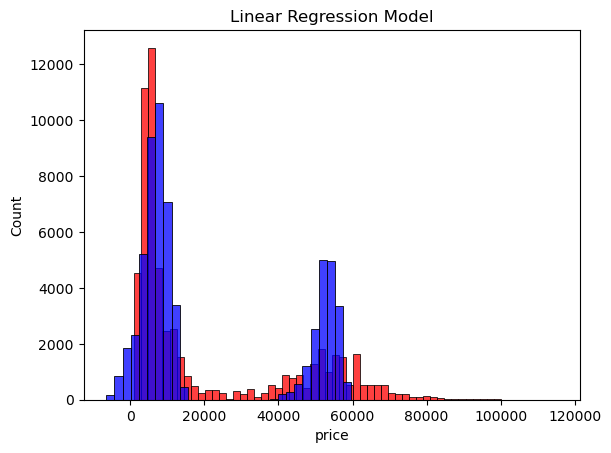

In [48]:
# Using a histogram to visualize the difference between actual and predicted prices
sns.histplot(y_test , label = "Actual", color = 'red')
sns.histplot(y_pred, label = "Predicted", color = 'blue')
plt.title("Linear Regression Model")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2168\4089861866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test , label = "Actual", color = 'red')
C:\Users\Dell\AppData\Local\Temp\ipykernel_2168\4089861866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "Predicted", col

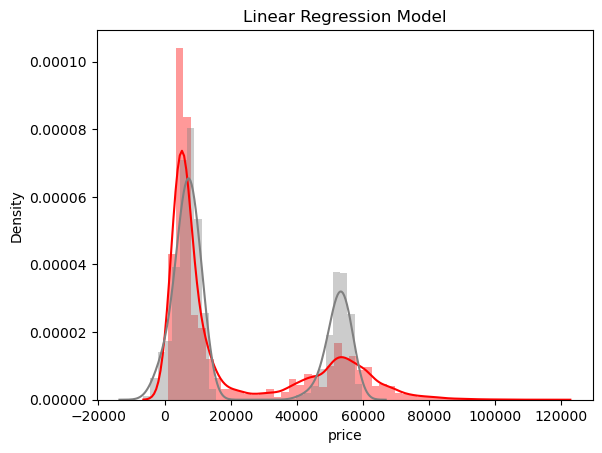

In [49]:
sns.distplot(y_test , label = "Actual", color = 'red')
sns.distplot(y_pred, label = "Predicted", color = 'grey')
plt.title("Linear Regression Model")
plt.show()

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
#Predicting price using the model
y_pred = dt_model.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean absolute percentage error: ",mean_absolute_percentage_error(y_test,y_pred))
print("Mean Square Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score:  0.9755212068521955
Mean Absolute Error:  1174.7141338086433
Mean absolute percentage error:  0.07358563458558963
Mean Square Error:  12618383.94605241
Root Mean Squared Error:  3552.236471021096


RMSE is 3564 and MAPE is 7.3 percent for the Decision Tree Regressor model. So it is a better fit compared to Linear Regression model.

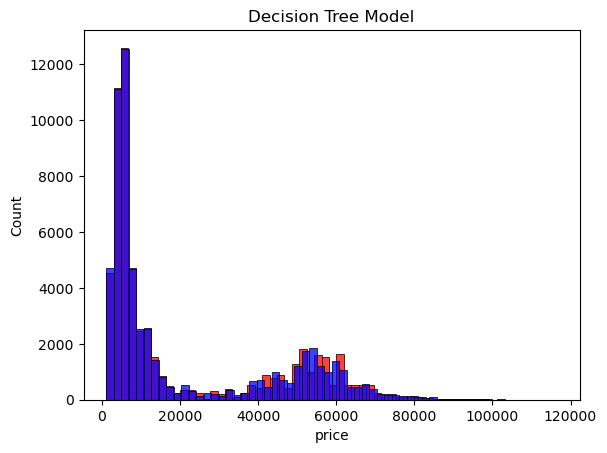

In [53]:
#Using a histogram to compare actual vs predicted values
sns.histplot(y_test,label="Actual",color='red')
sns.histplot(y_pred, label="Predicted",color='blue')
plt.title("Decision Tree Model")
plt.show()


In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)



RandomForestRegressor()

In [55]:
#Predicting prices using Random Forest Regressor
y_pred = rfr.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean absolute percentage error: ",mean_absolute_percentage_error(y_test,y_pred))
print("Mean Square Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score:  0.9849289685975269
Mean Absolute Error:  1091.1476572992601
Mean absolute percentage error:  0.07048524014521777
Mean Square Error:  7768849.532374747
Root Mean Squared Error:  2787.265601333096


Mean absolute percentage error is 7.3 percent and RMSE is 2824 which is less than the linear regression and decision tree mode

CONCLUSION: Random Forest Regressor is the best fit for predicting the Flight Ticket Price